In [ ]:
# 📊 Analýza teplot z meteorologické stanice Praha Klementinum
# Data: 1775-2024, zdroj ČHMÚ (data.gov.cz)
# Autor: Lenka Marešová

In [21]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
def open_dataset(filename):
    """Načte CSV soubor do DataFrame."""
    try:
        return pd.read_csv(filename)
    except FileNotFoundError:
        print(f"Soubor {filename} nenalezen")
        sys.exit(1)
    except Exception as e:
        print(e)
        sys.exit(1)

def save_without_duplicates(df, filename):
    """Uloží DataFrame bez duplicit do složky data_no_dup."""
    output_dir = os.path.join('data_no_dup', os.path.dirname(filename))
    os.makedirs(output_dir, exist_ok=True)
    df.to_csv(f"data_no_dup/{filename}")


def reduce_duplicates(filenames):
    """Odstraní duplicity ze seznamu CSV souborů."""
    for filename in filenames:
        df = open_dataset(f"data/{filename}")
        df = df.drop_duplicates()
        save_without_duplicates(df, filename)


In [23]:
def avg_temperatures_graph(df_t_avg, df_t_max_avg, df_t_min_avg):
    """Vykreslí časový průběh teplot"""

    plt.xlabel('Rok')
    plt.ylabel('Teplota')
    plt.plot(df_t_avg['YEAR'], df_t_avg['VALUE'], label='Průměrná roční teplota', color='green')
    plt.plot(df_t_max_avg['YEAR'], df_t_max_avg['VALUE'], label='průměrné maximální tebloty', color='red' )
    plt.plot(df_t_min_avg['YEAR'], df_t_min_avg['VALUE'], label='Průměrné minimální teploty', color='blue')
    plt.title('Vývoj ročních teplot v Praze - Klementinum (1775 - 2024)')
    plt.legend()
    plt.grid()
    plt.show()

In [24]:
def graph_compare_historical_avg_with_last_years(df_t_avg, df_t_max_avg, df_t_min_avg):
    """Vykreslí sloupcový graf pro porovnání teplot."""

    avg_t = df_t_avg['VALUE'].mean()
    avg_t_max = df_t_max_avg['VALUE'].mean()
    avg_t_min = df_t_min_avg['VALUE'].mean()
    avg_all = [avg_t, avg_t_max, avg_t_min]

    years = [2020, 2021, 2022, 2023, 2024]

    t_avg_recent = [df_t_avg[df_t_avg['YEAR'] == y]['VALUE'].mean() for y in years]
    t_max_avg_recent = [df_t_max_avg[df_t_max_avg['YEAR'] == y]['VALUE'].mean() for y in years]
    t_min_avg_recent = [df_t_min_avg[df_t_min_avg['YEAR'] == y]['VALUE'].mean() for y in years]

    labels = ['Maximální', 'Průměrná', 'Minimální']
    data = [
        [avg_all[1]] + t_max_avg_recent,
        [avg_all[0]] + t_avg_recent,
        [avg_all[2]] + t_min_avg_recent
    ]
    x = np.arange(len(labels))
    width = 0.13
    fig, ax = plt.subplots(figsize=(12, 6))
    year_labels = ['Historický průměr (1775-2024)'] + [str(y) for y in years]
    for i, year in enumerate(year_labels):
        vals = [data[j][i] for j in range(len(labels))]
        ax.bar(x + i*width, vals, width, label=year)
    ax.set_xticks(x + width*len(year_labels)/2)
    ax.set_xticklabels(labels)
    ax.set_ylabel('Teplota [°C]')
    ax.set_title('Srovnání průměrných ročních teplot s historickým průměrem')
    ax.legend()
    plt.show()

In [25]:
filenames = [
        'yrs/yrs-0-203-0-11514-T.csv',
        'yrs/yrs-0-203-0-11514-TMA.csv',
        'yrs/yrs-0-203-0-11514-TMI.csv',
    ]
reduce_duplicates(filenames)
df_t = open_dataset(f"data_no_dup/{filenames[0]}")[['YEAR', 'TIMEFUNCTION', 'MDFUNCTION', 'VALUE']] \
    .query("TIMEFUNCTION == 'AVG' and MDFUNCTION == 'AVG'")
df_t_max = open_dataset(f"data_no_dup/{filenames[1]}")[['YEAR', 'MDFUNCTION', 'VALUE']] \
    .query("MDFUNCTION == 'AVG'")
df_t_min_day = open_dataset(f"data_no_dup/{filenames[2]}")[['YEAR', 'MDFUNCTION', 'VALUE']] \
    .query("MDFUNCTION == 'AVG'")




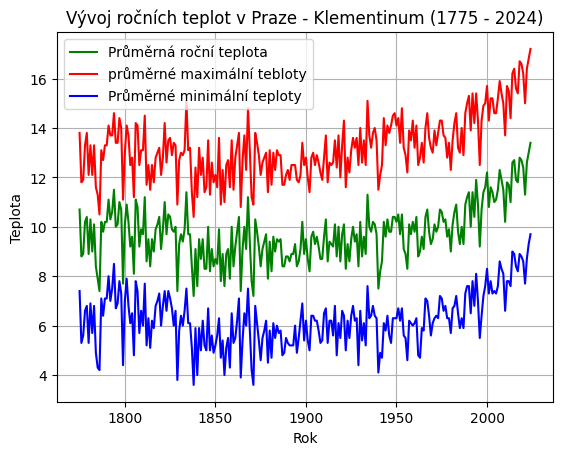

In [26]:
avg_temperatures_graph(df_t, df_t_max, df_t_min_day)
# zde se vykreslil do grafu časový průběh teplot
# vykresluje se zde průměrné maximální roční teploty, dále průměrné minimální roční teploty , a průměrné roční teploty

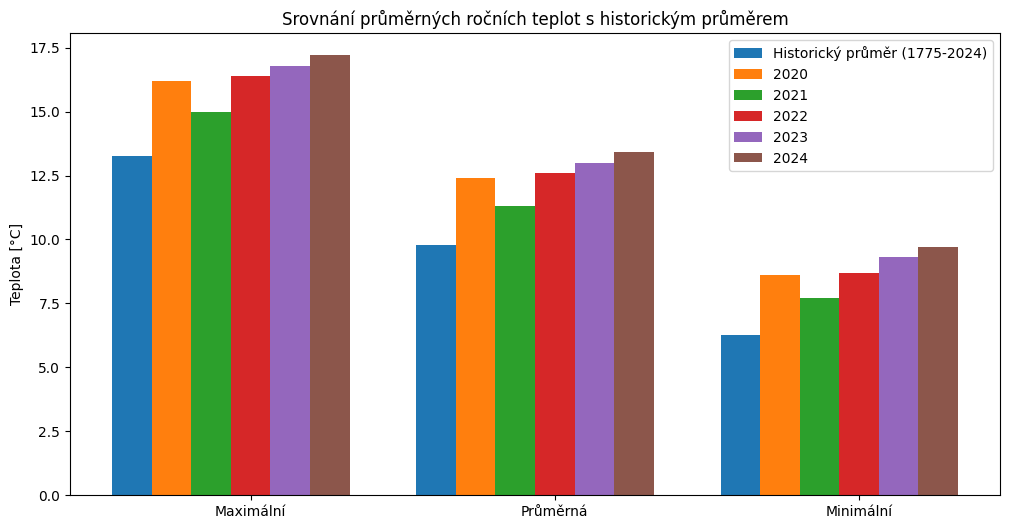

In [27]:
graph_compare_historical_avg_with_last_years(df_t, df_t_max, df_t_min_day)
# v tomto sloupcovém grafu vidíme 3 skupiny : 1. skupina jsou průměrné maximální roční teploty, 2. skupina jsou průměrné  roční teploty, 3. skupina jsou průměrné minimální roční teploty
# v každé skupin2 dále porovnáváme průměrnou hodnotu z let 1775-2024 a průměrné hodnoty z posledních 5 let

In [ ]:
# Závěr:
# Z grafů vyplývá, že v posledních letech jsou průměrné roční teploty vyšší než v dřívějších obdobích. Za posledních téměř 100 let pozorovat růst průměrných ročních teplot.
# Je však potřeba vzít v úvahu, že ve srovnání s celkovou dobou existence člověka na Zemi představuje toto období pouze krátků úsek. Proto nelze na základě jen těchto dat samotných tvrdit, že pozorovaný růst je projevem dlouhodobého zhoršování klimatických podmínek, pokud není potvryen i dalšími nezávislými zdroji a vědeckými obory.